In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"yadneshmundhada","key":"b8b6f5ac1e548b716da83b811e5cee1c"}'}

In [3]:
import tensorflow as tf
tf.__version__

!sudo pip3 install keras


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
device_list = tf.test.gpu_device_name()
device_list

'/device:GPU:0'

In [5]:
! mkdir ~/.kaggle

In [6]:
! cp kaggle.json ~/.kaggle/

In [7]:
! chmod 600 ~/.kaggle/kaggle.json

In [8]:
! kaggle competitions download -f train.zip.001 -p /content -c diabetic-retinopathy-detection
!7z x train.zip.001.zip
!rm train.zip.001.zip
!7z x train.zip.001
!rm train.zip.001

100% 7.81G/7.81G [01:17<00:00, 100MB/s] 
100% 7.81G/7.81G [01:17<00:00, 109MB/s]

7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 8391159087 bytes (8003 MiB)

Extracting archive: train.zip.001.zip
--
Path = train.zip.001.zip
Type = zip
Physical Size = 8391159087
64-bit = +

  0%      0% - train.zip.001                      1% - train.zip.001                      2% - train.zip.001                      3% - train.zip.001                      4% - train.zip.001                      5% - train.zip.001                      6

In [ ]:
! kaggle competitions download -f train.zip.002 -p /content -c diabetic-retinopathy-detection
!7z x train.zip.002.zip
!rm train.zip.002.zip
!7z x train.zip.002
!rm train.zip.002

In [ ]:
! kaggle competitions download -f train.zip.003 -p /content -c diabetic-retinopathy-detection
!7z x train.zip.003.zip
!rm train.zip.003.zip
!7z x train.zip.003
!rm train.zip.003

In [ ]:
! kaggle competitions download -f train.zip.004 -p /content -c diabetic-retinopathy-detection
!7z x train.zip.004.zip
!rm train.zip.004.zip
!7z x train.zip.004
!rm train.zip.004

In [ ]:
! kaggle competitions download -f train.zip.005 -p /content -c diabetic-retinopathy-detection
!7z x train.zip.005.zip
!rm train.zip.005.zip
!7z x train.zip.005
!rm train.zip.005

In [13]:
! kaggle competitions download -f trainLabels.csv.zip -p /content -c diabetic-retinopathy-detection
! unzip /content/trainLabels.csv.zip
! rm trainLabels.csv.zip

  0% 0.00/69.4k [00:00<?, ?B/s]
100% 69.4k/69.4k [00:00<00:00, 54.1MB/s]
Archive:  /content/trainLabels.csv.zip
  inflating: trainLabels.csv         


In [14]:
import pandas as pd
retina_df = pd.read_csv('/content/trainLabels.csv');
retina_df

,image,level
0,10_left,0
1,10_right,0
2,13_left,0
3,13_right,0
4,15_left,1
...,...,...
35121,44347_right,0
35122,44348_left,0
35123,44348_right,0
35124,44349_left,0


In [ ]:
retina_df.values

array([['10_left', 0],
       ['10_right', 0],
       ['13_left', 0],
       ...,
       ['44348_right', 0],
       ['44349_left', 0],
       ['44349_right', 1]], dtype=object)

In [ ]:
# import os
# import numpy as np
# listing = os.listdir("../content/train") 
# np.size(listing)

8408

Create seperate directories for different classes

In [ ]:
import shutil
import sys
import os
train_dir=r'../content/train'
DR=r'../content/train/'
# if not os.path.exists(DR):
#   os.mkdir(DR)
for filename,class_name in retina_df.values:
  if(not os.path.exists(DR+str(class_name))):
    os.mkdir(DR+str(class_name))
  src = train_dir+'/'+filename+'.jpeg'
  dst = DR + str(class_name)+'/'+filename+'.jpeg'
  try:
    shutil.move(src,dst);
    print("done"+filename);
  except IOError as e:
    print('Unable to move')

In [ ]:
# import shutil
# import sys
# import os
# test_dir=r'../content/test'
# DT=r'../content/test/'
# for filename,class_name in df.values:
#   if(not os.path.exists(DT+str(class_name))):
#     os.mkdir(DT+str(class_name))
#   src = test_dir+'/'+filename+'.jpeg'
#   dst = DT + str(class_name)+'/'+filename+'.jpeg'
#   try:
#     shutil.move(src,dst);
#     print("done"+filename);
#   except IOError as e:
#     print('Unable to move')
#   except:
#     print('error:{}'.format(sys.exe_info()))

In [16]:
from PIL import Image
from keras.preprocessing import image
import os
import numpy as np
import pandas as pd

from subprocess import check_output

Data Augmentation using Keras ImageDataGenerator

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from PIL import Image
datagen = ImageDataGenerator(
        preprocessing_function=preprocess_input,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
img = Image.open('../content/train/0/10003_left.jpeg')
x=img.resize((200,200))
im=np.array(x.getdata()).reshape(1,200,200,3)
i = 0
for batch in datagen.flow(im, batch_size=1,
                          save_to_dir='../content/view', save_prefix='dr0', save_format='jpeg'):
    i += 1
    if i > 20:
        break

Various images generated which adds to the training images

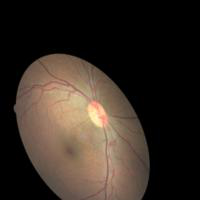

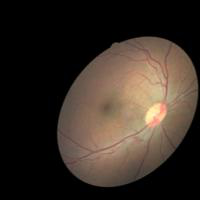

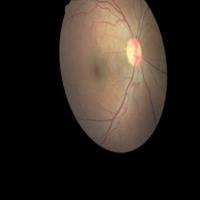

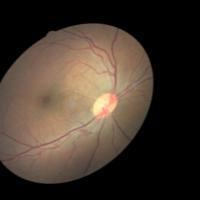

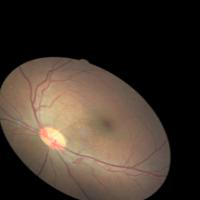

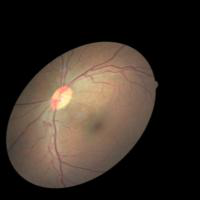

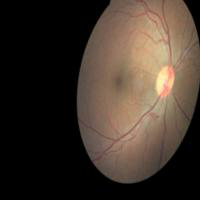

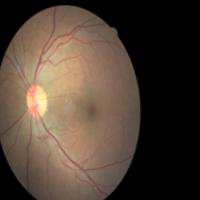

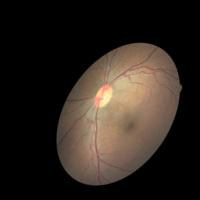

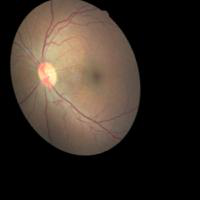

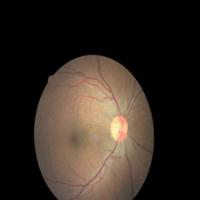

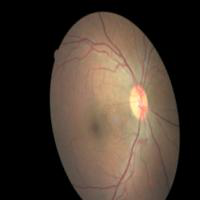

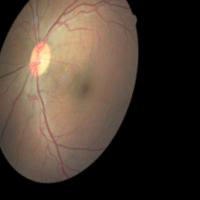

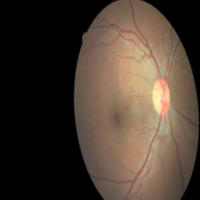

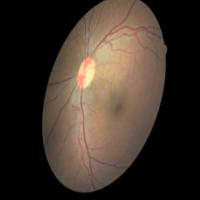

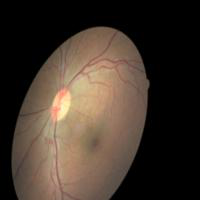

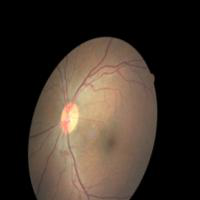

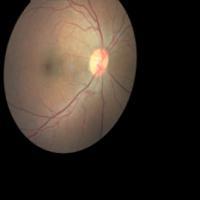

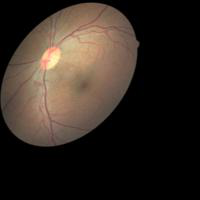

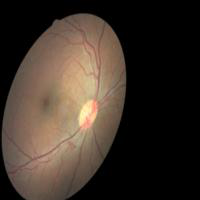

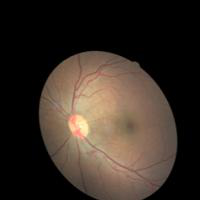

In [ ]:
# Image Augmentation
%matplotlib inline
from os import listdir
import PIL

imagesList = listdir('../content/view')
for image in imagesList:
  img = Image.open('../content/view/' + image)
  display(img)

In [17]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [18]:
batch_size = 32
nb_classes = 5
nb_epoch = 5
nb_filters = 32
nb_pool = 2
nb_conv = 3

In [19]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import preprocess_input
import numpy as np
from PIL import Image
train_datagen = ImageDataGenerator(
        preprocessing_function=preprocess_input,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
        '../content/train',
        target_size=(224, 224), 
        batch_size=batch_size,
        class_mode='categorical',
        subset='training')  

validation_generator = train_datagen.flow_from_directory(
        '../content/train',
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical',
        subset='validation')


Found 28103 images belonging to 5 classes.
Found 7023 images belonging to 5 classes.


# VGG16 Model

In [20]:
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
pre_trained_model=VGG16(input_shape=(224,224,3),
                        include_top=False)

58900480/58889256 [==============================] - 0s 0us/step


In [21]:
for layer in pre_trained_model.layers:
  layer.trainable = False

In [22]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import layers
from tensorflow.keras import Model

x = layers.Flatten()(pre_trained_model.output)                
x = layers.Dense  (5, activation='softmax')(x)           

model = Model( pre_trained_model.input, x) 

model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy',tf.keras.metrics.AUC()])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [23]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
batch_size=16
checkpoint = ModelCheckpoint("../content/vgg.h5", monitor='val_accuracy', 
                             verbose=1, save_best_only=True, 
                             save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='loss', min_delta=0, patience=8, verbose=1, mode='auto')
mod = model.fit_generator(steps_per_epoch=100,
                           generator=train_generator, 
                           validation_data= validation_generator, 
                           validation_steps=50,
                           epochs=15,callbacks=[checkpoint,early])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/15
100/100 [==============================] - ETA: 0s - loss: 0.8416 - accuracy: 0.7513 - auc: 0.8985
Epoch 1: val_accuracy improved from -inf to 0.71188, saving model to ../content/vgg.h5
100/100 [==============================] - 613s 6s/step - loss: 0.8416 - accuracy: 0.7513 - auc: 0.8985 - val_loss: 0.9167 - val_accuracy: 0.7119 - val_auc: 0.8872
Epoch 2/15
100/100 [==============================] - ETA: 0s - loss: 0.8777 - accuracy: 0.7347 - auc: 0.8929
Epoch 2: val_accuracy improved from 0.71188 to 0.72500, saving model to ../content/vgg.h5
100/100 [==============================] - 601s 6s/step - loss: 0.8777 - accuracy: 0.7347 - auc: 0.8929 - val_loss: 0.8884 - val_accuracy: 0.7250 - val_auc: 0.8915
Epoch 3/15
100/100 [==============================] - ETA: 0s - loss: 0.8779 - accuracy: 0.7316 - auc: 0.8934
Epoch 3: val_accuracy improved from 0.72500 to 0.74313, saving model to ../content/vgg.h5
100/100 [==============================] - 610s 6s/step - loss: 0.8779 - ac

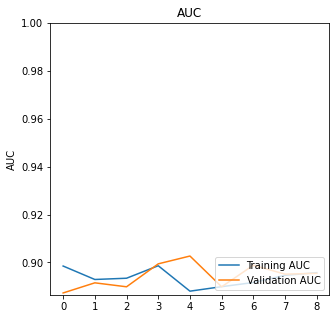

In [24]:
import matplotlib.pyplot as plt
auc = mod.history['auc']
val_auc = mod.history['val_auc']

plt.figure(figsize=(5, 5))
plt.plot(auc, label='Training AUC')
plt.plot(val_auc, label='Validation AUC')
plt.legend(loc='lower right')
plt.ylabel('AUC')
plt.ylim([min(plt.ylim()),1])
plt.title('AUC')

plt.show();